In [101]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [102]:
gc_df = pd.read_csv("german_credit.csv")

In [103]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
gc_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [104]:
Y= gc_df['default']
X= gc_df.drop('default', axis= 1)
X.shape


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
X_train.shape

(500, 20)

In [105]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 789 to 37
Data columns (total 20 columns):
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object
people_under_maintenance      500 non-null int64
t

In [107]:
X_train_m = pd.get_dummies(X_train)
X_train_m. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 789 to 37
Data columns (total 61 columns):
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status_< 0 DM                                                   500 non-null uint8
account_check_status_

In [108]:
X_train_m.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [109]:
X_train_m.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)


### Drop the original variables which are converted to dummy

In [110]:
#  dropping from the original dataframe as there is no strong correlation .
gc_df.drop(['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors'], axis = 1, inplace = True)
gc_df.drop(['property','other_installment_plans','housing','job','telephone','foreign_worker'], axis = 1, inplace = True)
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
default                       1000 non-null int64
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
installment_as_income_perc    1000 non-null int64
present_res_since             1000 non-null int64
age                           1000 non-null int64
credits_this_bank             1000 non-null int64
people_under_maintenance      1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [111]:
Y= gc_df['default']
X= gc_df.drop('default', axis= 1)
X.shape


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
X_train.shape

(700, 7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [112]:
from sklearn.ensemble import RandomForestClassifier 

In [113]:
clf = RandomForestClassifier(n_jobs =2 ,n_estimators=500,criterion='entropy',random_state=9999)

In [114]:
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [115]:
y_predict = clf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [116]:
from sklearn import metrics

print(clf.score(X_train , y_train))
print(clf.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

1.0
0.72
[[188  26]
 [ 58  28]]


### Q6 Show the list of the features importance( 1 Marks)

In [117]:
print (pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                 Imp
duration_in_month           0.191778
credit_amount               0.333290
installment_as_income_perc  0.067890
present_res_since           0.083672
age                         0.250596
credits_this_bank           0.047919
people_under_maintenance    0.024855


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [144]:
# Use below values
num_folds = 10
seed = 77
cv = KFold(n_splits=num_folds, random_state=seed)
cv

KFold(n_splits=10, random_state=77, shuffle=False)

In [120]:
#Validate the Random Forest model build above using k fold

In [121]:
scores_rf = []

for train_index, test_index in cv.split(X,Y):
    #print(train_index, test_index)
    #X_train = X.iloc[train_index]
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],Y.iloc[train_index], Y.iloc[test_index]
    clf.fit(X_train, y_train)
    scores_rf.append(clf.score(X_test, y_test))
    
print(scores_rf)

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]


In [0]:
#Calculate Mean score

In [128]:
print(np.mean(scores_rf))

0.7090000000000001


In [0]:
# Calculate score standard deviation using std()

In [127]:
print(np.std(scores_rf))

0.04825971404805461


# Q8 Print the confusion matrix( 1 Marks)

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).

In [133]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)

print(conf_mat)
#clf.predict(X_test)

[[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [138]:
tp = conf_mat[0,0]
tn = conf_mat[1,1]
fp = conf_mat[1,0]
fn = conf_mat[0,1]

In [142]:
correct_pred = (tp + tn)/(tp + tn + fp + fn) # also called accuracy
sensitivity = tp/(tp + fn) # also called True postive rate or recall
precision = tp/(tp + fp)

print("% of correct prediction :" , correct_pred * 100)
print("sensitivity :", sensitivity)
print("precision :", precision)

% of correct prediction : 71.0
sensitivity : 0.8971428571428571
precision : 0.7423167848699763


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

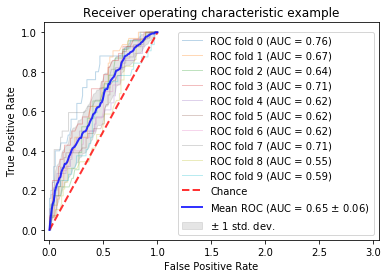

In [151]:
from scipy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train_index, test_index in cv.split(X,Y):
    #print(train_index, test_index)
    #X_train = X.iloc[train_index]
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index],Y.iloc[train_index], Y.iloc[test_index]
    clf.fit(X_train, y_train)
    probas_ = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 3.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
